## Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import copy
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import scipy.stats as stats



## Read the data into the notebook

In [5]:
insurance_data = pd.read_csv('insurance.csv') # read the data as a data frame

In [6]:
insurance_data.head()  #checking the head of the data frame

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Basic EDA
* Find the shape of the data,data type of individual columns
* Check the presence of missing values
* Descriptive stats of numerical columns
* Find the distribution of numerical columns and the asssociated skeweness and presence of outliers 
* Distribution of categorical columns

In [7]:
insurance_data.info()  #info about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### - The data has 1338 instances with 7 attributes. 2 integer type, 2 float type and 3 object type(Strings in the column) 

In [8]:
insurance_data.shape

(1338, 7)

The data set contains 1338 observatiosn of data and 7 variables.

# Check for missing value

In [9]:
# Check for missing value in any colum
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### - There are no null values in any of the column

# Checking the summary of dataframe

In [10]:
insurance_data.describe().T   # five point summary of the continuous attributes

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


-Data looks legit as all the statistics seem reasonable
-Looking at the age column, data looks representative of the true age distribution of the adult population
-Very few people have more than 2 children. 75% of the people have 2 or less children
-The claimed amount is higly skewed as most people would require basic medi-care and only few suffer from             diseases which cost more to get rid of

# Plot the Histograms

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

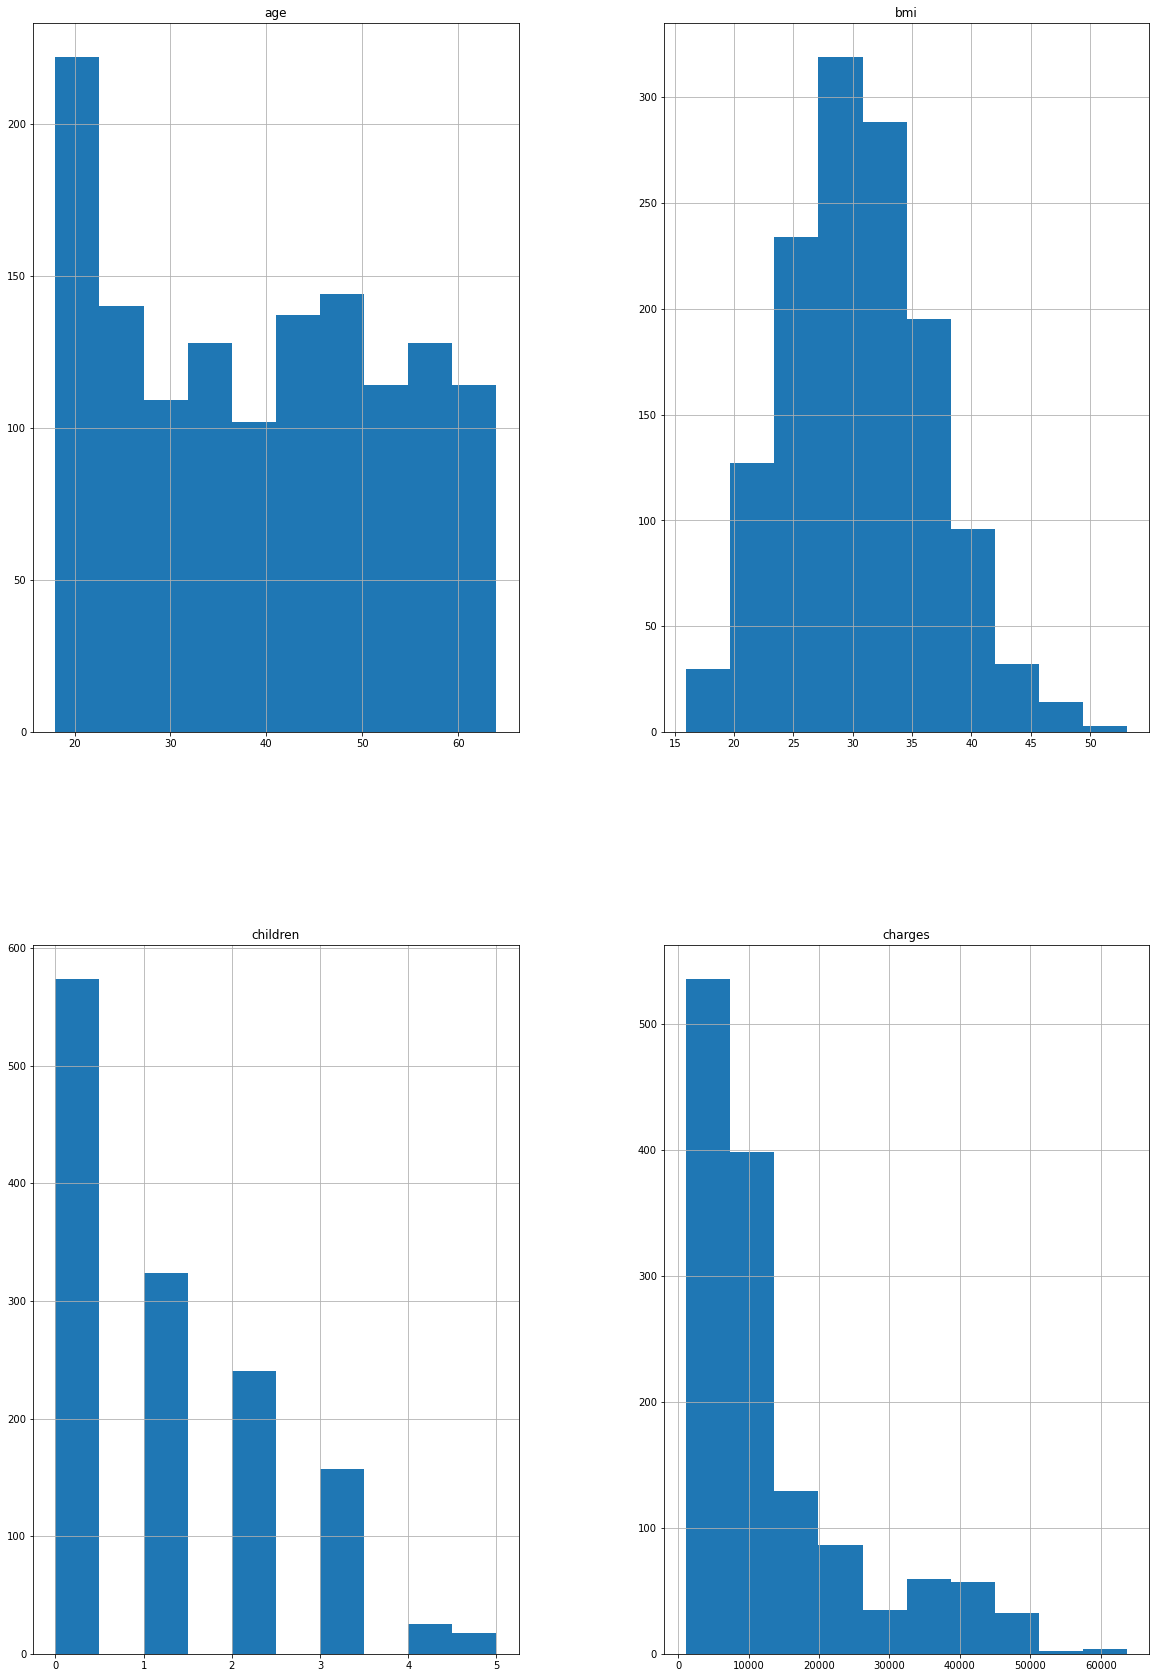

In [11]:
#Plots to see the distribution of the continuous features individually
insurance_data.hist(figsize=(20,30))

- bmi looks quiet normally distributed 
- Age seems be be distributed quiet uniformly 
- As seen in the previous step, charges are highly skewed

In [12]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(insurance_data.bmi),stats.skew(insurance_data.age),stats.skew(insurance_data.charges)]},
                        index=['bmi','age','charges'])  # Measure the skeweness of the required columns
Skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


- Skew of bmi is very less as seen in the previous step
- age is uniformly distributed and there's hardly any skew
- charges are highly skewed

# Check Outliers

Box plot will be plotted to check for outliers.

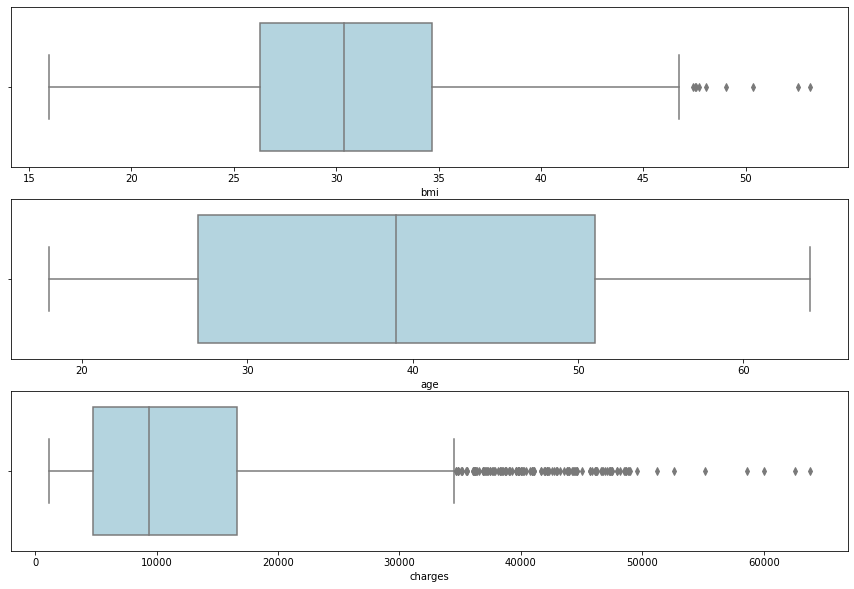

In [13]:
plt.figure(figsize= (15,10))
plt.subplot(3,1,1)
sns.boxplot(x= insurance_data.bmi, color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(x= insurance_data.age, color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x= insurance_data.charges, color='lightblue')

plt.show()

- There are no outliers present in the age variable. 
- bmi variable shows presence of few extreme values 
- charges as it is highly skewed, there are quiet a lot of extreme values.

# Plot Count Plot

We will plot various  count plot to see how the variable has been distributed.

<AxesSubplot:xlabel='sex', ylabel='count'>

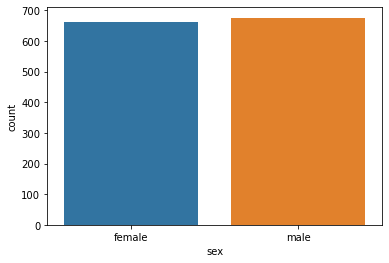

In [15]:
sns.countplot(x=insurance_data['sex'])

<AxesSubplot:xlabel='smoker', ylabel='count'>

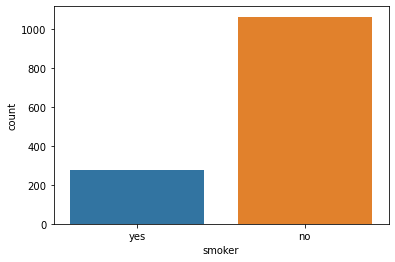

In [16]:
sns.countplot(x=insurance_data['smoker'])

<AxesSubplot:xlabel='region', ylabel='count'>

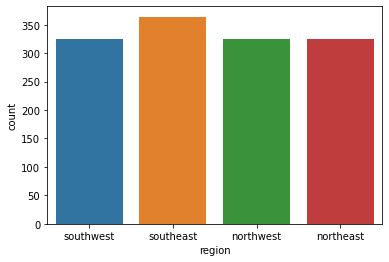

In [17]:
sns.countplot(x=insurance_data['region'])

<AxesSubplot:xlabel='children', ylabel='count'>

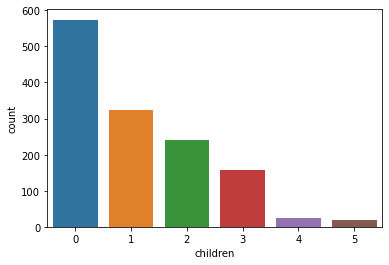

In [18]:
sns.countplot(x=insurance_data['children'])

- There are a lot more non-smokers than there are smokers in the data
- Instances are distributed evenly accross all regions
- Gender is also distributed evenly
- Most instances have less than 2 children and very few have 4 or 5 children

### Bi-variate distribution of every possible attribute pair

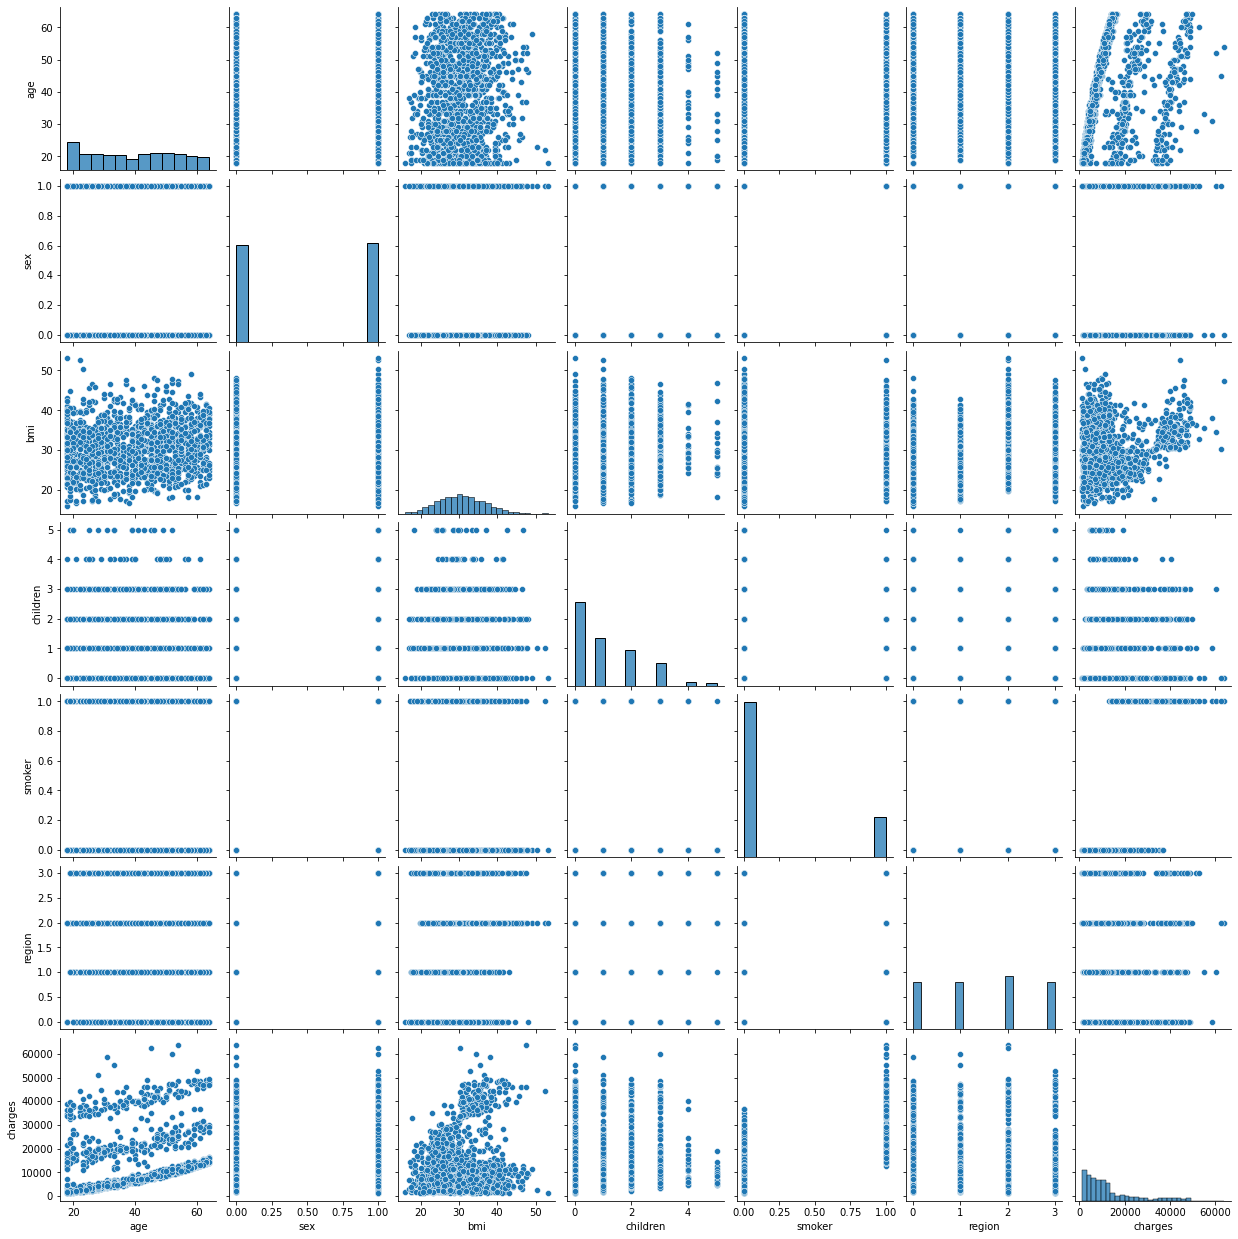

In [19]:
#Label encoding the variables before doing a pairplot because pairplot ignores strings
df_encoded = copy.deepcopy(insurance_data)
df_encoded.loc[:,['sex', 'smoker', 'region']] = df_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 

sns.pairplot(df_encoded)  #pairplot
plt.show()

- The only obvious correlation of 'charges' is with 'smoker' 
- Looks like smokers claimed more money than non-smokers
- There's an interesting pattern between 'age' and 'charges. Could be because for the same ailment, older people are charged more than the younger ones

# Check Correlation

To find out the correlation we will use the corr function and also we will plot a heatmap to visualise this correlation.

In [20]:
corr = insurance_data.corr()
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

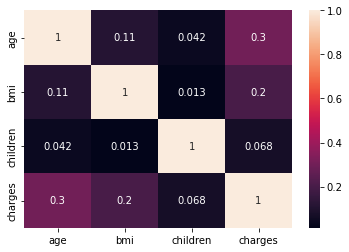

In [21]:
sns.heatmap(corr, annot=True)

## Do charges of people who smoke differ significantly from the people who don't?

In [22]:
insurance_data.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

C:\Users\noahr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


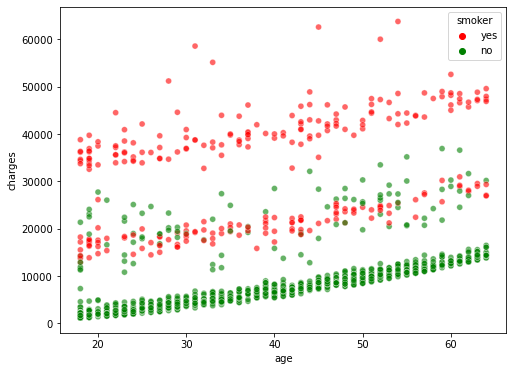

In [23]:
#Scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages
plt.figure(figsize=(8,6))
sns.scatterplot(insurance_data.age, insurance_data.charges,hue=insurance_data.smoker,palette= ['red','green'] ,alpha=0.6)
plt.show()

- Visually the difference between charges of smokers and charges of non-smokers is apparent

## Does bmi of males differ significantly from that of females?

In [24]:
insurance_data.sex.value_counts()   #Checking the distribution of males and females

male      676
female    662
Name: sex, dtype: int64

C:\Users\noahr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


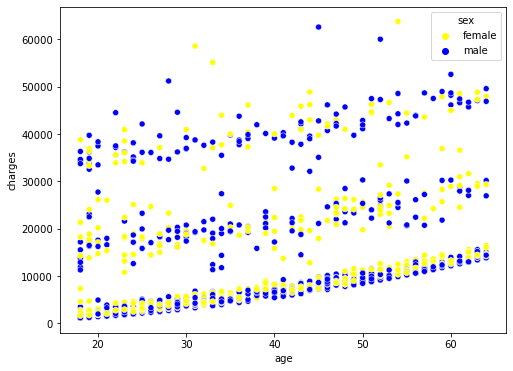

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(df.age, df.charges,hue=df.sex,palette= ['yellow','blue'] )
plt.show()

##### * bmi of both the genders are identical